<a href="https://colab.research.google.com/github/jugeromel/IA/blob/main/descritivas_pns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import gspread
from google.colab import auth
from google.auth import default
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Autentica√ß√£o no Google Sheets
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [4]:
# Abrir a planilha (substitua pela URL da sua planilha)
spreadsheet_url = "https://docs.google.com/spreadsheets/d/1I24Kf6bGwSVId656EP7EMwq6B-jijddrPvzdl8bYXes/edit?gid=132358131#gid=132358131"
worksheet = gc.open_by_url(spreadsheet_url).sheet1

In [5]:
# Ler os dados
data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [6]:
# Mostrar informa√ß√µes b√°sicas do dataset
print("=== INFORMAC√ïES GERAIS DO DATASET ===")
print(f"Shape: {df.shape}")
print(f"Colunas: {df.columns.tolist()}")
print("\nPrimeiras 5 linhas:")
print(df.head())

print("\n" + "="*50)
print("ESTAT√çSTICAS DESCRITIVAS GERAIS")
print("="*50)

=== INFORMAC√ïES GERAIS DO DATASET ===
Shape: (90846, 78)
Colunas: ['v0025a', 'v00291', 'peso_morador_selec', 'UF', 'Capital', 'GrandesRegioes', 'Sit_Urbano_Rural', 'Sexo', 'faixa_idade', 'idade', 'Raca', 'race', 'rend_per_capita', 'renda', 'Q014P', 'depressao', 'Q014Q', 'depressao_terapia', 'Q014R', 'depressao_medicacao', 'Q014S', 'depressao_alternativa', 'Q014T', 'depressao_likert', 'Q015P', 'outro_diagnostico', 'Q015Q', 'outro_terapia', 'Q015R', 'outro_medicacao', 'Q015S', 'outro_alternativa', 'Q015T', 'outro_likert', 'feijao', 'verdura', 'carne_vermelha', 'frango', 'peixe', 'frutas', 'refri', 'doces', 'lanches_rapidos', 'health_diet', 'unhealth_diet', 'c011', 'p034', 'p035', 'p03702', 'atv_fisica', 'p04501', 'p04502', 'p050', 'p05402', 'sexo_masc', 'sexo_fem', 'sex_dummy', 'casado', 'minutos_semanais', 'ativo_oms', 'horas_tv', 'horas_dispositivos', 'horas_telas_total', 'tempo_tela_excessivo', 'fumante', 'tabagismo_alto_risco', 'raca_dummy', 'urb_rur_dummy', 'renda_dummy', 'depressa

In [7]:
# Estat√≠sticas descritivas para vari√°veis num√©ricas
print("\n--- Estat√≠sticas Descritivas (Vari√°veis Num√©ricas) ---")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(df[numeric_cols].describe())


--- Estat√≠sticas Descritivas (Vari√°veis Num√©ricas) ---
        v0025a            UF  Sit_Urbano_Rural          Sexo         idade  \
count  90846.0  90846.000000      90846.000000  90846.000000  90846.000000   
mean       1.0     29.661504          1.230863      1.528884     46.394855   
std        0.0     11.670391          0.421387      0.499168     17.597113   
min        1.0     11.000000          1.000000      1.000000     15.000000   
25%        1.0     22.000000          1.000000      1.000000     32.000000   
50%        1.0     28.000000          1.000000      2.000000     45.000000   
75%        1.0     35.000000          1.000000      2.000000     60.000000   
max        1.0     53.000000          2.000000      2.000000    107.000000   

               race     depressao  depressao_terapia  depressao_medicacao  \
count  90846.000000  90846.000000       90846.000000         90846.000000   
mean       2.678698      1.908284           1.982465             1.952139   
std    

In [8]:
# Estat√≠sticas para vari√°veis categ√≥ricas
print("\n--- Estat√≠sticas Descritivas (Vari√°veis Categ√≥ricas) ---")
categorical_cols = ['depressao', 'outro_diagnostico', 'Sexo', 'faixa_idade', 'Raca', 'GrandesRegioes']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts(normalize=True) * 100)

print("\n" + "="*50)
print("AN√ÅLISE DE SA√öDE MENTAL")
print("="*50)


--- Estat√≠sticas Descritivas (Vari√°veis Categ√≥ricas) ---

depressao:
depressao
2    90.828435
1     9.171565
Name: proportion, dtype: float64

outro_diagnostico:
outro_diagnostico
2    95.118112
1     4.881888
Name: proportion, dtype: float64

Sexo:
Sexo
2    52.888405
1    47.111595
Name: proportion, dtype: float64

faixa_idade:
faixa_idade
30 a 44 anos       29.449838
45 a 59 anos       26.038571
60 a 74 anos       18.456509
18 a 29 anos       16.945160
75 anos ou mais     6.561654
                    2.548268
Name: proportion, dtype: float64

Raca:
Raca
Parda     50.628536
Branca    36.471611
Preta     11.387403
           1.512450
Name: proportion, dtype: float64

GrandesRegioes:
GrandesRegioes
Nordeste        34.722497
Sudeste         21.828149
Norte           19.375647
Sul             12.627964
Centro-Oeste    11.445743
Name: proportion, dtype: float64

AN√ÅLISE DE SA√öDE MENTAL


In [9]:
# An√°lise detalhada das vari√°veis de sa√∫de mental
saude_mental_vars = [
    'depressao', 'depressao_terapia', 'depressao_medicacao',
    'depressao_alternativa', 'depressao_likert',
    'outro_diagnostico', 'outro_terapia', 'outro_medicacao',
    'outro_alternativa', 'outro_likert'
]

print("\n--- Preval√™ncia de Condi√ß√µes de Sa√∫de Mental ---")
for var in saude_mental_vars:
    if var in df.columns:
        print(f"\n{var}:")
        print(df[var].value_counts(normalize=True).round(4) * 100)

print("\n" + "="*50)
print("TABELA RESUMO DAS PRINCIPAIS ESTAT√çSTICAS")
print("="*50)


--- Preval√™ncia de Condi√ß√µes de Sa√∫de Mental ---

depressao:
depressao
2    90.83
1     9.17
Name: proportion, dtype: float64

depressao_terapia:
depressao_terapia
2    98.25
1     1.75
Name: proportion, dtype: float64

depressao_medicacao:
depressao_medicacao
2    95.21
1     4.79
Name: proportion, dtype: float64

depressao_alternativa:
depressao_alternativa
2    99.47
1     0.53
Name: proportion, dtype: float64

depressao_likert:
depressao_likert
     90.83
1     5.06
2     1.78
3     1.20
4     0.78
5     0.35
Name: proportion, dtype: float64

outro_diagnostico:
outro_diagnostico
2    95.12
1     4.88
Name: proportion, dtype: float64

outro_terapia:
outro_terapia
2    98.83
1     1.17
Name: proportion, dtype: float64

outro_medicacao:
outro_medicacao
2    97.07
1     2.93
Name: proportion, dtype: float64

outro_alternativa:
outro_alternativa
2    99.58
1     0.42
Name: proportion, dtype: float64

outro_likert:
outro_likert
     94.60
1     2.65
2     1.18
3     0.74
4     0.55


In [11]:
# Criar tabela resumo com as principais estat√≠sticas
tabela_resumo = []

In [13]:
# Vari√°veis de interesse para o resumo
vars_interesse = [
    'depressao_dummy', 'outro_diagnostico_dummy', 'sex_dummy',
    'faixa_idade', 'raca_dummy', 'renda_dummy', 'urb_rur_dummy',
    'ativo_oms', 'tempo_tela_excessivo', 'fumante'
]

for var in vars_interesse:
    if var in df.columns:
        if df[var].dtype in ['int64', 'float64']:
            # Para vari√°veis dummy/num√©ricas
            media = df[var].mean() * 100
            count = df[var].count()
            tabela_resumo.append({
                'Vari√°vel': var,
                'N': count,
                'M√©dia (%)': round(media, 2),
                'Descri√ß√£o': 'Propor√ß√£o com caracter√≠stica'
            })
        else:
            # Para vari√°veis categ√≥ricas
            count = df[var].count()
            unique_count = df[var].nunique()
            tabela_resumo.append({
                'Vari√°vel': var,
                'N': count,
                'Categorias': unique_count,
                'Descri√ß√£o': 'Vari√°vel categ√≥rica'
            })

# Converter para DataFrame e mostrar
df_resumo = pd.DataFrame(tabela_resumo)
print(df_resumo.to_string(index=False))

print("\n" + "="*50)
print("AN√ÅLISE POR GRUPOS - SA√öDE MENTAL")
print("="*50)

               Vari√°vel     N  M√©dia (%)                    Descri√ß√£o  Categorias
        depressao_dummy 90846       9.17 Propor√ß√£o com caracter√≠stica         NaN
outro_diagnostico_dummy 90846       4.88 Propor√ß√£o com caracter√≠stica         NaN
              sex_dummy 90846      52.89 Propor√ß√£o com caracter√≠stica         NaN
            faixa_idade 90846        NaN          Vari√°vel categ√≥rica         6.0
             raca_dummy 90846        NaN          Vari√°vel categ√≥rica         3.0
            renda_dummy 90846        NaN          Vari√°vel categ√≥rica         3.0
          urb_rur_dummy 90846      76.91 Propor√ß√£o com caracter√≠stica         NaN
              ativo_oms 90846        NaN          Vari√°vel categ√≥rica         3.0
   tempo_tela_excessivo 90846      45.94 Propor√ß√£o com caracter√≠stica         NaN
                fumante 90846      12.53 Propor√ß√£o com caracter√≠stica         NaN
        depressao_dummy 90846       9.17 Propor√ß√£o com caracter√≠s

In [14]:
# An√°lise por sexo
if 'sex_dummy' in df.columns and 'depressao_dummy' in df.columns:
    print("\n--- Preval√™ncia de Depress√£o por Sexo ---")
    depressao_por_sexo = df.groupby('sex_dummy')['depressao_dummy'].agg(['mean', 'count'])
    depressao_por_sexo['mean'] = depressao_por_sexo['mean'] * 100
    print(depressao_por_sexo.round(2))


--- Preval√™ncia de Depress√£o por Sexo ---
            mean  count
sex_dummy              
0           4.57  42799
1          13.27  48047


In [15]:
# An√°lise por faixa et√°ria
if 'faixa_idade' in df.columns and 'depressao_dummy' in df.columns:
    print("\n--- Preval√™ncia de Depress√£o por Faixa Et√°ria ---")
    depressao_idade = df.groupby('faixa_idade')['depressao_dummy'].agg(['mean', 'count'])
    depressao_idade['mean'] = depressao_idade['mean'] * 100
    print(depressao_idade.round(2))


--- Preval√™ncia de Depress√£o por Faixa Et√°ria ---
                  mean  count
faixa_idade                  
                  3.89   2315
18 a 29 anos      5.43  15394
30 a 44 anos      8.35  26754
45 a 59 anos     11.86  23655
60 a 74 anos     10.94  16767
75 anos ou mais   8.91   5961


In [16]:
# An√°lise por renda
if 'renda_dummy' in df.columns and 'depressao_dummy' in df.columns:
    print("\n--- Preval√™ncia de Depress√£o por Renda ---")
    depressao_renda = df.groupby('renda_dummy')['depressao_dummy'].agg(['mean', 'count'])
    depressao_renda['mean'] = depressao_renda['mean'] * 100
    print(depressao_renda.round(2))

print("\n" + "="*50)
print("CORRELA√á√ïES ENTRE VARI√ÅVEIS DE SA√öDE MENTAL")
print("="*50)


--- Preval√™ncia de Depress√£o por Renda ---
              mean  count
renda_dummy              
0             8.05  50103
1            10.55  40721
              4.55     22

CORRELA√á√ïES ENTRE VARI√ÅVEIS DE SA√öDE MENTAL


In [17]:
# Matriz de correla√ß√£o para vari√°veis de sa√∫de mental
saude_mental_dummy_vars = [col for col in df.columns if 'dummy' in col and any(x in col for x in ['depressao', 'outro'])]
if saude_mental_dummy_vars:
    corr_matrix = df[saude_mental_dummy_vars].corr()
    print(corr_matrix.round(3))

print("\n" + "="*50)
print("VISUALIZA√á√ïES")
print("="*50)

                             depressao_dummy  depressao_terapia_dummy  \
depressao_dummy                        1.000                    0.420   
depressao_terapia_dummy                0.420                    1.000   
depressao_medicacao_dummy              0.706                    0.480   
depressao_alternativa_dummy            0.231                    0.218   
outro_diagnostico_dummy                0.294                    0.225   
outro_terapia_dummy                    0.204                    0.467   
outro_medicacao_dummy                  0.273                    0.264   
outro_alternativa_dummy                0.098                    0.115   

                             depressao_medicacao_dummy  \
depressao_dummy                                  0.706   
depressao_terapia_dummy                          0.480   
depressao_medicacao_dummy                        1.000   
depressao_alternativa_dummy                      0.184   
outro_diagnostico_dummy                          0.2

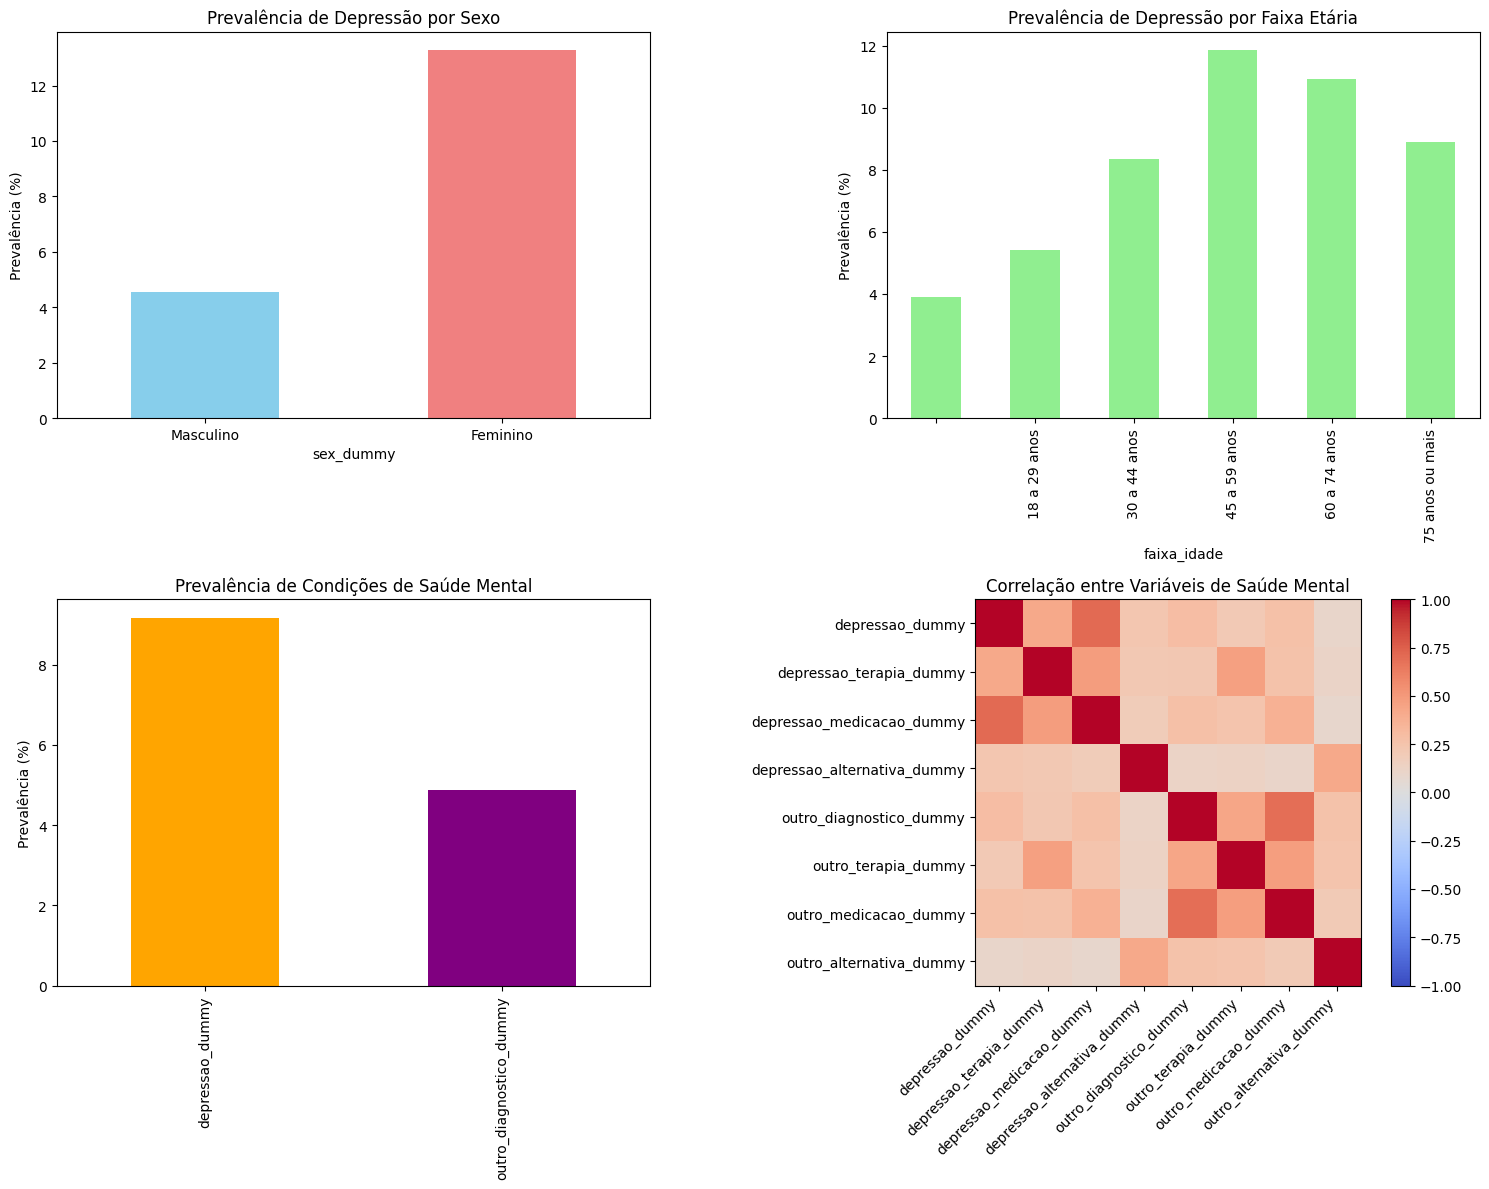

In [23]:
# Configurar estilo dos gr√°ficos
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Gr√°fico 1: Preval√™ncia de depress√£o por sexo
if 'sex_dummy' in df.columns and 'depressao_dummy' in df.columns:
    depressao_sexo = df.groupby('sex_dummy')['depressao_dummy'].mean() * 100
    depressao_sexo.plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral'])
    axes[0,0].set_title('Preval√™ncia de Depress√£o por Sexo')
    axes[0,0].set_ylabel('Preval√™ncia (%)')
    axes[0,0].set_xticklabels(['Masculino', 'Feminino'], rotation=0)

# Gr√°fico 2: Preval√™ncia de depress√£o por faixa et√°ria
if 'faixa_idade' in df.columns and 'depressao_dummy' in df.columns:
    depressao_idade = df.groupby('faixa_idade')['depressao_dummy'].mean() * 100
    depressao_idade.plot(kind='bar', ax=axes[0,1], color='lightgreen')
    axes[0,1].set_title('Preval√™ncia de Depress√£o por Faixa Et√°ria')
    axes[0,1].set_ylabel('Preval√™ncia (%)')

# Gr√°fico 3: Distribui√ß√£o de condi√ß√µes de sa√∫de mental
if 'depressao_dummy' in df.columns and 'outro_diagnostico_dummy' in df.columns:
    saude_mental_counts = df[['depressao_dummy', 'outro_diagnostico_dummy']].mean() * 100
    saude_mental_counts.plot(kind='bar', ax=axes[1,0], color=['orange', 'purple'])
    axes[1,0].set_title('Preval√™ncia de Condi√ß√µes de Sa√∫de Mental')
    axes[1,0].set_ylabel('Preval√™ncia (%)')

# Gr√°fico 4: Correla√ß√£o entre vari√°veis de sa√∫de mental
if saude_mental_dummy_vars:
    corr_matrix_vis = df[saude_mental_dummy_vars].corr()
    im = axes[1,1].imshow(corr_matrix_vis, cmap='coolwarm', vmin=-1, vmax=1)
    axes[1,1].set_xticks(range(len(saude_mental_dummy_vars)))
    axes[1,1].set_yticks(range(len(saude_mental_dummy_vars)))
    axes[1,1].set_xticklabels(saude_mental_dummy_vars, rotation=45, ha='right')
    axes[1,1].set_yticklabels(saude_mental_dummy_vars)
    axes[1,1].set_title('Correla√ß√£o entre Vari√°veis de Sa√∫de Mental')
    plt.colorbar(im, ax=axes[1,1])

plt.tight_layout()
plt.show()

In [24]:
# Estat√≠sticas finais resumidas
print("\n" + "="*50)
print("RESUMO FINAL")
print("="*50)

if 'depressao_dummy' in df.columns:
    total_depressao = df['depressao_dummy'].sum()
    prevalencia_depressao = df['depressao_dummy'].mean() * 100
    print(f"Total com depress√£o: {total_depressao}")
    print(f"Preval√™ncia de depress√£o: {prevalencia_depressao:.2f}%")

if 'outro_diagnostico_dummy' in df.columns:
    total_outro = df['outro_diagnostico_dummy'].sum()
    prevalencia_outro = df['outro_diagnostico_dummy'].mean() * 100
    print(f"Total com outro diagn√≥stico mental: {total_outro}")
    print(f"Preval√™ncia de outro diagn√≥stico mental: {prevalencia_outro:.2f}%")

print(f"\nTamanho total da amostra: {len(df)}")
print(f"Vari√°veis dispon√≠veis: {len(df.columns)}")


RESUMO FINAL
Total com depress√£o: 8332
Preval√™ncia de depress√£o: 9.17%
Total com outro diagn√≥stico mental: 4435
Preval√™ncia de outro diagn√≥stico mental: 4.88%

Tamanho total da amostra: 90846
Vari√°veis dispon√≠veis: 78


In [26]:
print("=== M√âDIAS DE RENDA (CONVERTIDA) ===\n")

# Converter renda categ√≥rica para num√©rica
renda_mapeamento = {
    1: 125.00, 2: 375.00, 3: 750.00, 4: 1500.00,
    5: 2500.00, 6: 4000.00, 7: 7000.00
}

if 'renda' in df.columns:
    df['renda_numerica'] = df['renda'].map(renda_mapeamento)

    # 1. Popula√ß√£o total
    media_total = df['renda_numerica'].mean()
    print(f"üí∞ Renda m√©dia da popula√ß√£o: R$ {media_total:,.2f}")

    # 2. Pessoas com doen√ßas mentais
    if all(col in df.columns for col in ['depressao_dummy', 'outro_diagnostico_dummy']):
        doentes = df[(df['depressao_dummy'] == 1) | (df['outro_diagnostico_dummy'] == 1)]
        saudaveis = df[(df['depressao_dummy'] == 0) & (df['outro_diagnostico_dummy'] == 0)]

        if len(doentes) > 0:
            media_doentes = doentes['renda_numerica'].mean()
            media_saudaveis = saudaveis['renda_numerica'].mean()

            print(f"üè• Renda m√©dia (com doen√ßas mentais): R$ {media_doentes:,.2f}")
            print(f"üíö Renda m√©dia (sem doen√ßas mentais): R$ {media_saudaveis:,.2f}")
            print(f"üìä Diferen√ßa: R$ {media_doentes - media_saudaveis:+,.2f}")
            print(f"üë• Pessoas com doen√ßas: {len(doentes):,}")

=== M√âDIAS DE RENDA (CONVERTIDA) ===

üí∞ Renda m√©dia da popula√ß√£o: R$ 1,507.00
üè• Renda m√©dia (com doen√ßas mentais): R$ 1,795.48
üíö Renda m√©dia (sem doen√ßas mentais): R$ 1,468.47
üìä Diferen√ßa: R$ +327.01
üë• Pessoas com doen√ßas: 10,701


In [27]:
# Vers√£o mais simples e direta
print("\n" + "="*50)
print("üéØ RESUMO SIMPLES:")
print("="*50)

if 'idade' in df.columns:
    print(f"üë• Popula√ß√£o total: {df['idade'].mean():.1f} anos")

if all(col in df.columns for col in ['idade', 'sex_dummy']):
    homens = df[df['sex_dummy'] == 0]
    mulheres = df[df['sex_dummy'] == 1]

    if len(homens) > 0 and len(mulheres) > 0:
        print(f"‚ôÇÔ∏è Homens: {homens['idade'].mean():.1f} anos")
        print(f"‚ôÄÔ∏è Mulheres: {mulheres['idade'].mean():.1f} anos")
        print(f"üìä Diferen√ßa: {homens['idade'].mean() - mulheres['idade'].mean():+.1f} anos")

if all(col in df.columns for col in ['idade', 'depressao_dummy', 'outro_diagnostico_dummy']):
    doentes = df[(df['depressao_dummy'] == 1) | (df['outro_diagnostico_dummy'] == 1)]
    saudaveis = df[(df['depressao_dummy'] == 0) & (df['outro_diagnostico_dummy'] == 0)]

    if len(doentes) > 0 and len(saudaveis) > 0:
        print(f"üè• Com doen√ßas mentais: {doentes['idade'].mean():.1f} anos")
        print(f"üíö Sem doen√ßas mentais: {saudaveis['idade'].mean():.1f} anos")
        print(f"üìà Diferen√ßa: {doentes['idade'].mean() - saudaveis['idade'].mean():+.1f} anos")


üéØ RESUMO SIMPLES:
üë• Popula√ß√£o total: 46.4 anos
‚ôÇÔ∏è Homens: 45.9 anos
‚ôÄÔ∏è Mulheres: 46.9 anos
üìä Diferen√ßa: -1.0 anos
üè• Com doen√ßas mentais: 48.3 anos
üíö Sem doen√ßas mentais: 46.1 anos
üìà Diferen√ßa: +2.1 anos


In [28]:
print("=== IDADE M√âDIA DA POPULA√á√ÉO ===\n")

if 'idade' in df.columns:
    # Popula√ß√£o total
    print(f"üë• IDADE M√âDIA TOTAL: {df['idade'].mean():.1f} anos")
    print(f"üìä Amostra total: {len(df):,} pessoas")

    # Por sexo
    if 'sex_dummy' in df.columns:
        homens = df[df['sex_dummy'] == 0]
        mulheres = df[df['sex_dummy'] == 1]

        print(f"\n‚ôÇÔ∏è Homens: {homens['idade'].mean():.1f} anos (n={len(homens):,})")
        print(f"‚ôÄÔ∏è Mulheres: {mulheres['idade'].mean():.1f} anos (n={len(mulheres):,})")
        print(f"üìà Diferen√ßa: {homens['idade'].mean() - mulheres['idade'].mean():+.1f} anos")

    # Por sa√∫de mental
    if all(col in df.columns for col in ['depressao_dummy', 'outro_diagnostico_dummy']):
        doentes = df[(df['depressao_dummy'] == 1) | (df['outro_diagnostico_dummy'] == 1)]
        saudaveis = df[(df['depressao_dummy'] == 0) & (df['outro_diagnostico_dummy'] == 0)]

        if len(doentes) > 0:
            print(f"\nüè• Com doen√ßas mentais: {doentes['idade'].mean():.1f} anos (n={len(doentes):,})")
            print(f"üíö Sem doen√ßas mentais: {saudaveis['idade'].mean():.1f} anos (n={len(saudaveis):,})")

=== IDADE M√âDIA DA POPULA√á√ÉO ===

üë• IDADE M√âDIA TOTAL: 46.4 anos
üìä Amostra total: 90,846 pessoas

‚ôÇÔ∏è Homens: 45.9 anos (n=42,799)
‚ôÄÔ∏è Mulheres: 46.9 anos (n=48,047)
üìà Diferen√ßa: -1.0 anos

üè• Com doen√ßas mentais: 48.3 anos (n=10,701)
üíö Sem doen√ßas mentais: 46.1 anos (n=80,145)


In [33]:
print("=== M√âDIAS DE TEMPO DE TELA E EXERC√çCIO ===\n")

# Converter vari√°veis num√©ricas
variaveis_numericas = ['minutos_semanais', 'horas_tv', 'horas_dispositivos', 'horas_telas_total']

for var in variaveis_numericas:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

# Converter dummies (0/1) para num√©rico
variaveis_dummy = ['ativo_oms', 'tempo_tela_excessivo']

for var in variaveis_dummy:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

# 1. Tempo de exerc√≠cio f√≠sico
if 'minutos_semanais' in df.columns:
    dados_exercicio = df['minutos_semanais'].dropna()
    if len(dados_exercicio) > 0:
        tempo_exercicio = dados_exercicio.mean()
        print(f"üí™ TEMPO M√âDIO DE EXERC√çCIO: {tempo_exercicio:.1f} minutos/semana")
        print(f"   Amostra: {len(dados_exercicio):,} pessoas")

        # Porcentagem que atende recomenda√ß√£o da OMS (dummy)
        if 'ativo_oms' in df.columns:
            dados_oms = df['ativo_oms'].dropna()
            if len(dados_oms) > 0:
                atende_oms = dados_oms.mean() * 100
                print(f"   Atende OMS (‚â•150min/semana): {atende_oms:.1f}%")
    else:
        print("‚ùå Sem dados v√°lidos para 'minutos_semanais'")
else:
    print("‚ùå Vari√°vel 'minutos_semanais' n√£o encontrada")

print()

# 2. Tempo de tela total
if 'horas_telas_total' in df.columns:
    dados_tela = df['horas_telas_total'].dropna()
    if len(dados_tela) > 0:
        tempo_tela = dados_tela.mean()
        print(f"üì± TEMPO M√âDIO DE TELA TOTAL: {tempo_tela:.1f} horas/dia")
        print(f"   Amostra: {len(dados_tela):,} pessoas")

        # Porcentagem com tempo excessivo (dummy)
        if 'tempo_tela_excessivo' in df.columns:
            dados_excessivo = df['tempo_tela_excessivo'].dropna()
            if len(dados_excessivo) > 0:
                excessivo = dados_excessivo.mean() * 100
                print(f"   Tempo excessivo (>3h/dia): {excessivo:.1f}%")
    else:
        print("‚ùå Sem dados v√°lidos para 'horas_telas_total'")
else:
    print("‚ùå Vari√°vel 'horas_telas_total' n√£o encontrada")

print()

# 3. Tempo de tela por tipo
if 'horas_tv' in df.columns:
    dados_tv = df['horas_tv'].dropna()
    if len(dados_tv) > 0:
        tempo_tv = dados_tv.mean()
        print(f"üì∫ TEMPO M√âDIO DE TV: {tempo_tv:.1f} horas/dia")
        print(f"   Amostra: {len(dados_tv):,} pessoas")

if 'horas_dispositivos' in df.columns:
    dados_disp = df['horas_dispositivos'].dropna()
    if len(dados_disp) > 0:
        tempo_dispositivos = dados_disp.mean()
        print(f"üì± TEMPO M√âDIO EM DISPOSITIVOS: {tempo_dispositivos:.1f} horas/dia")
        print(f"   Amostra: {len(dados_disp):,} pessoas")

print(f"\nüéØ RESUMO GERAL:")
if 'minutos_semanais' in df.columns and 'horas_telas_total' in df.columns:
    dados_exercicio = df['minutos_semanais'].dropna()
    dados_tela = df['horas_telas_total'].dropna()

    if len(dados_exercicio) > 0 and len(dados_tela) > 0:
        tempo_exercicio = dados_exercicio.mean()
        tempo_tela = dados_tela.mean()

        print(f"‚Ä¢ Exerc√≠cio: {tempo_exercicio:.1f} min/semana")
        print(f"‚Ä¢ Telas: {tempo_tela:.1f} h/dia")

        # Calcular rela√ß√£o apenas se tempo_exercicio for maior que zero
        if tempo_exercicio > 0:
            # Converter para minutos por dia para comparar
            exercicio_min_dia = tempo_exercicio / 7
            tela_min_dia = tempo_tela * 60
            relacao = tela_min_dia / exercicio_min_dia
            print(f"‚Ä¢ Rela√ß√£o: {relacao:.1f}x mais tempo em telas que exerc√≠cios")

=== M√âDIAS DE TEMPO DE TELA E EXERC√çCIO ===

üí™ TEMPO M√âDIO DE EXERC√çCIO: 49.3 minutos/semana
   Amostra: 35,196 pessoas
   Atende OMS (‚â•150min/semana): 14.6%

üì± TEMPO M√âDIO DE TELA TOTAL: 3.8 horas/dia
   Amostra: 90,846 pessoas
   Tempo excessivo (>3h/dia): 45.9%

üì∫ TEMPO M√âDIO DE TV: 1.7 horas/dia
   Amostra: 90,846 pessoas
üì± TEMPO M√âDIO EM DISPOSITIVOS: 2.1 horas/dia
   Amostra: 90,846 pessoas

üéØ RESUMO GERAL:
‚Ä¢ Exerc√≠cio: 49.3 min/semana
‚Ä¢ Telas: 3.8 h/dia
‚Ä¢ Rela√ß√£o: 32.1x mais tempo em telas que exerc√≠cios


In [34]:
print("=== TEMPOS DE TELA E EXERC√çCIO POR SA√öDE MENTAL ===\n")

# Converter vari√°veis num√©ricas
variaveis_numericas = ['minutos_semanais', 'horas_tv', 'horas_dispositivos', 'horas_telas_total']

for var in variaveis_numericas:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

# Converter dummies para num√©rico
variaveis_dummy = ['ativo_oms', 'tempo_tela_excessivo', 'depressao_dummy', 'outro_diagnostico_dummy']

for var in variaveis_dummy:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

# Criar vari√°vel combinada para qualquer doen√ßa mental
if all(col in df.columns for col in ['depressao_dummy', 'outro_diagnostico_dummy']):
    df['qualquer_doenca_mental'] = ((df['depressao_dummy'] == 1) | (df['outro_diagnostico_dummy'] == 1)).astype(int)

    # Filtrar os grupos
    com_doenca = df[df['qualquer_doenca_mental'] == 1]
    sem_doenca = df[df['qualquer_doenca_mental'] == 0]

    print(f"üë• DISTRIBUI√á√ÉO:")
    print(f"‚Ä¢ Com doen√ßas mentais: {len(com_doenca):,} pessoas")
    print(f"‚Ä¢ Sem doen√ßas mentais: {len(sem_doenca):,} pessoas")
    print(f"‚Ä¢ Total amostra: {len(df):,} pessoas")

    print("\n" + "="*50)
    print("üí™ EXERC√çCIO F√çSICO")
    print("="*50)

    # Tempo de exerc√≠cio f√≠sico
    if 'minutos_semanais' in df.columns:
        # Com doen√ßa mental
        exercicio_com = com_doenca['minutos_semanais'].dropna()
        if len(exercicio_com) > 0:
            tempo_com = exercicio_com.mean()
            print(f"\nCOM DOEN√áAS MENTAIS:")
            print(f"‚Ä¢ Tempo m√©dio: {tempo_com:.1f} minutos/semana")
            print(f"‚Ä¢ Amostra: {len(exercicio_com):,} pessoas")

            # Atende OMS
            if 'ativo_oms' in df.columns:
                oms_com = com_doenca['ativo_oms'].dropna().mean() * 100
                print(f"‚Ä¢ Atende OMS: {oms_com:.1f}%")

        # Sem doen√ßa mental
        exercicio_sem = sem_doenca['minutos_semanais'].dropna()
        if len(exercicio_sem) > 0:
            tempo_sem = exercicio_sem.mean()
            print(f"\nSEM DOEN√áAS MENTAIS:")
            print(f"‚Ä¢ Tempo m√©dio: {tempo_sem:.1f} minutos/semana")
            print(f"‚Ä¢ Amostra: {len(exercicio_sem):,} pessoas")

            # Atende OMS
            if 'ativo_oms' in df.columns:
                oms_sem = sem_doenca['ativo_oms'].dropna().mean() * 100
                print(f"‚Ä¢ Atende OMS: {oms_sem:.1f}%")

        # Diferen√ßa
        if len(exercicio_com) > 0 and len(exercicio_sem) > 0:
            diferenca = tempo_com - tempo_sem
            print(f"\nüìä DIFEREN√áA:")
            print(f"‚Ä¢ Com - Sem: {diferenca:+.1f} minutos")
            print(f"‚Ä¢ Percentual: {(diferenca/tempo_sem)*100:+.1f}%")

    print("\n" + "="*50)
    print("üì± TEMPO DE TELA")
    print("="*50)

    # Tempo de tela total
    if 'horas_telas_total' in df.columns:
        # Com doen√ßa mental
        tela_com = com_doenca['horas_telas_total'].dropna()
        if len(tela_com) > 0:
            tempo_tela_com = tela_com.mean()
            print(f"\nCOM DOEN√áAS MENTAIS:")
            print(f"‚Ä¢ Tempo m√©dio: {tempo_tela_com:.1f} horas/dia")
            print(f"‚Ä¢ Amostra: {len(tela_com):,} pessoas")

            # Tempo excessivo
            if 'tempo_tela_excessivo' in df.columns:
                excessivo_com = com_doenca['tempo_tela_excessivo'].dropna().mean() * 100
                print(f"‚Ä¢ Tempo excessivo: {excessivo_com:.1f}%")

        # Sem doen√ßa mental
        tela_sem = sem_doenca['horas_telas_total'].dropna()
        if len(tela_sem) > 0:
            tempo_tela_sem = tela_sem.mean()
            print(f"\nSEM DOEN√áAS MENTAIS:")
            print(f"‚Ä¢ Tempo m√©dio: {tempo_tela_sem:.1f} horas/dia")
            print(f"‚Ä¢ Amostra: {len(tela_sem):,} pessoas")

            # Tempo excessivo
            if 'tempo_tela_excessivo' in df.columns:
                excessivo_sem = sem_doenca['tempo_tela_excessivo'].dropna().mean() * 100
                print(f"‚Ä¢ Tempo excessivo: {excessivo_sem:.1f}%")

        # Diferen√ßa
        if len(tela_com) > 0 and len(tela_sem) > 0:
            diferenca_tela = tempo_tela_com - tempo_tela_sem
            print(f"\nüìä DIFEREN√áA:")
            print(f"‚Ä¢ Com - Sem: {diferenca_tela:+.1f} horas")
            print(f"‚Ä¢ Percentual: {(diferenca_tela/tempo_tela_sem)*100:+.1f}%")

    print("\n" + "="*50)
    print("üì∫ TEMPO DE TELA POR TIPO")
    print("="*50)

    # TV
    if 'horas_tv' in df.columns:
        tv_com = com_doenca['horas_tv'].dropna().mean()
        tv_sem = sem_doenca['horas_tv'].dropna().mean()
        print(f"üì∫ TV:")
        print(f"‚Ä¢ Com doen√ßas: {tv_com:.1f} h/dia")
        print(f"‚Ä¢ Sem doen√ßas: {tv_sem:.1f} h/dia")
        print(f"‚Ä¢ Diferen√ßa: {tv_com - tv_sem:+.1f} h/dia")

    # Dispositivos
    if 'horas_dispositivos' in df.columns:
        disp_com = com_doenca['horas_dispositivos'].dropna().mean()
        disp_sem = sem_doenca['horas_dispositivos'].dropna().mean()
        print(f"\nüì± Dispositivos:")
        print(f"‚Ä¢ Com doen√ßas: {disp_com:.1f} h/dia")
        print(f"‚Ä¢ Sem doen√ßas: {disp_sem:.1f} h/dia")
        print(f"‚Ä¢ Diferen√ßa: {disp_com - disp_sem:+.1f} h/dia")

    print("\n" + "="*50)
    print("üéØ RESUMO FINAL")
    print("="*50)

    if 'minutos_semanais' in df.columns and 'horas_telas_total' in df.columns:
        exercicio_com_val = com_doenca['minutos_semanais'].dropna().mean()
        exercicio_sem_val = sem_doenca['minutos_semanais'].dropna().mean()
        tela_com_val = com_doenca['horas_telas_total'].dropna().mean()
        tela_sem_val = sem_doenca['horas_telas_total'].dropna().mean()

        print(f"üí™ EXERC√çCIO:")
        print(f"‚Ä¢ Com doen√ßas: {exercicio_com_val:.1f} min/semana")
        print(f"‚Ä¢ Sem doen√ßas: {exercicio_sem_val:.1f} min/semana")
        print(f"‚Ä¢ Diferen√ßa: {exercicio_com_val - exercicio_sem_val:+.1f} min")

        print(f"\nüì± TELAS:")
        print(f"‚Ä¢ Com doen√ßas: {tela_com_val:.1f} h/dia")
        print(f"‚Ä¢ Sem doen√ßas: {tela_sem_val:.1f} h/dia")
        print(f"‚Ä¢ Diferen√ßa: {tela_com_val - tela_sem_val:+.1f} h")

else:
    print("‚ùå Vari√°veis de doen√ßas mentais n√£o encontradas")

=== TEMPOS DE TELA E EXERC√çCIO POR SA√öDE MENTAL ===

üë• DISTRIBUI√á√ÉO:
‚Ä¢ Com doen√ßas mentais: 10,701 pessoas
‚Ä¢ Sem doen√ßas mentais: 80,145 pessoas
‚Ä¢ Total amostra: 90,846 pessoas

üí™ EXERC√çCIO F√çSICO

COM DOEN√áAS MENTAIS:
‚Ä¢ Tempo m√©dio: 53.6 minutos/semana
‚Ä¢ Amostra: 4,208 pessoas
‚Ä¢ Atende OMS: 15.8%

SEM DOEN√áAS MENTAIS:
‚Ä¢ Tempo m√©dio: 48.7 minutos/semana
‚Ä¢ Amostra: 30,988 pessoas
‚Ä¢ Atende OMS: 14.5%

üìä DIFEREN√áA:
‚Ä¢ Com - Sem: +4.9 minutos
‚Ä¢ Percentual: +10.0%

üì± TEMPO DE TELA

COM DOEN√áAS MENTAIS:
‚Ä¢ Tempo m√©dio: 4.0 horas/dia
‚Ä¢ Amostra: 10,701 pessoas
‚Ä¢ Tempo excessivo: 49.7%

SEM DOEN√áAS MENTAIS:
‚Ä¢ Tempo m√©dio: 3.7 horas/dia
‚Ä¢ Amostra: 80,145 pessoas
‚Ä¢ Tempo excessivo: 45.4%

üìä DIFEREN√áA:
‚Ä¢ Com - Sem: +0.2 horas
‚Ä¢ Percentual: +6.0%

üì∫ TEMPO DE TELA POR TIPO
üì∫ TV:
‚Ä¢ Com doen√ßas: 1.8 h/dia
‚Ä¢ Sem doen√ßas: 1.6 h/dia
‚Ä¢ Diferen√ßa: +0.1 h/dia

üì± Dispositivos:
‚Ä¢ Com doen√ßas: 2.2 h/dia
‚Ä¢ Sem doen√ßas: 

In [35]:
print("=== PROPOR√á√ÉO DE FUMANTES POR SA√öDE MENTAL ===\n")

# Converter dummies para num√©rico
variaveis_dummy = ['fumante', 'tabagismo_alto_risco', 'depressao_dummy', 'outro_diagnostico_dummy']

for var in variaveis_dummy:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

# Criar grupos de sa√∫de mental
if all(col in df.columns for col in ['depressao_dummy', 'outro_diagnostico_dummy']):
    df['qualquer_doenca_mental'] = ((df['depressao_dummy'] == 1) | (df['outro_diagnostico_dummy'] == 1)).astype(int)

    # Definir os grupos
    populacao_total = df
    sem_doenca = df[df['qualquer_doenca_mental'] == 0]
    com_doenca = df[df['qualquer_doenca_mental'] == 1]

    print(f"üë• DISTRIBUI√á√ÉO DOS GRUPOS:")
    print(f"‚Ä¢ Popula√ß√£o total: {len(populacao_total):,} pessoas")
    print(f"‚Ä¢ Sem diagn√≥stico: {len(sem_doenca):,} pessoas")
    print(f"‚Ä¢ Com diagn√≥stico: {len(com_doenca):,} pessoas")

    print("\n" + "="*50)
    print("üö¨ PROPOR√á√ÉO DE FUMANTES")
    print("="*50)

    if 'fumante' in df.columns:
        # Calcular propor√ß√µes
        fumante_total = populacao_total['fumante'].mean() * 100
        fumante_sem = sem_doenca['fumante'].mean() * 100
        fumante_com = com_doenca['fumante'].mean() * 100

        print(f"POPULA√á√ÉO TOTAL:")
        print(f"‚Ä¢ {fumante_total:.1f}% s√£o fumantes")
        print(f"‚Ä¢ {populacao_total['fumante'].sum():,} fumantes")

        print(f"\nSEM DIAGN√ìSTICO:")
        print(f"‚Ä¢ {fumante_sem:.1f}% s√£o fumantes")
        print(f"‚Ä¢ {sem_doenca['fumante'].sum():,} fumantes")

        print(f"\nCOM DIAGN√ìSTICO:")
        print(f"‚Ä¢ {fumante_com:.1f}% s√£o fumantes")
        print(f"‚Ä¢ {com_doenca['fumante'].sum():,} fumantes")

        print(f"\nüìä DIFEREN√áA:")
        print(f"‚Ä¢ Com vs Sem diagn√≥stico: {fumante_com - fumante_sem:+.1f} pontos percentuais")
        print(f"‚Ä¢ Com diagn√≥stico fuma {fumante_com/fumante_sem:.1f}x mais")

    print("\n" + "="*50)
    print("üö≠ TABAGISMO DE ALTO RISCO")
    print("="*50)

    if 'tabagismo_alto_risco' in df.columns:
        # Calcular propor√ß√µes
        alto_risco_total = populacao_total['tabagismo_alto_risco'].mean() * 100
        alto_risco_sem = sem_doenca['tabagismo_alto_risco'].mean() * 100
        alto_risco_com = com_doenca['tabagismo_alto_risco'].mean() * 100

        print(f"POPULA√á√ÉO TOTAL:")
        print(f"‚Ä¢ {alto_risco_total:.1f}% t√™m tabagismo de alto risco")
        print(f"‚Ä¢ {populacao_total['tabagismo_alto_risco'].sum():,} pessoas")

        print(f"\nSEM DIAGN√ìSTICO:")
        print(f"‚Ä¢ {alto_risco_sem:.1f}% t√™m tabagismo de alto risco")
        print(f"‚Ä¢ {sem_doenca['tabagismo_alto_risco'].sum():,} pessoas")

        print(f"\nCOM DIAGN√ìSTICO:")
        print(f"‚Ä¢ {alto_risco_com:.1f}% t√™m tabagismo de alto risco")
        print(f"‚Ä¢ {com_doenca['tabagismo_alto_risco'].sum():,} pessoas")

        print(f"\nüìä DIFEREN√áA:")
        print(f"‚Ä¢ Com vs Sem diagn√≥stico: {alto_risco_com - alto_risco_sem:+.1f} pontos percentuais")
        print(f"‚Ä¢ Com diagn√≥stico tem {alto_risco_com/alto_risco_sem:.1f}x mais alto risco")

else:
    print("‚ùå Vari√°veis de doen√ßas mentais n√£o encontradas")

=== PROPOR√á√ÉO DE FUMANTES POR SA√öDE MENTAL ===

üë• DISTRIBUI√á√ÉO DOS GRUPOS:
‚Ä¢ Popula√ß√£o total: 90,846 pessoas
‚Ä¢ Sem diagn√≥stico: 80,145 pessoas
‚Ä¢ Com diagn√≥stico: 10,701 pessoas

üö¨ PROPOR√á√ÉO DE FUMANTES
POPULA√á√ÉO TOTAL:
‚Ä¢ 12.5% s√£o fumantes
‚Ä¢ 11,386 fumantes

SEM DIAGN√ìSTICO:
‚Ä¢ 12.3% s√£o fumantes
‚Ä¢ 9,855 fumantes

COM DIAGN√ìSTICO:
‚Ä¢ 14.3% s√£o fumantes
‚Ä¢ 1,531 fumantes

üìä DIFEREN√áA:
‚Ä¢ Com vs Sem diagn√≥stico: +2.0 pontos percentuais
‚Ä¢ Com diagn√≥stico fuma 1.2x mais

üö≠ TABAGISMO DE ALTO RISCO
POPULA√á√ÉO TOTAL:
‚Ä¢ 0.6% t√™m tabagismo de alto risco
‚Ä¢ 482.0 pessoas

SEM DIAGN√ìSTICO:
‚Ä¢ 0.6% t√™m tabagismo de alto risco
‚Ä¢ 396.0 pessoas

COM DIAGN√ìSTICO:
‚Ä¢ 0.9% t√™m tabagismo de alto risco
‚Ä¢ 86.0 pessoas

üìä DIFEREN√áA:
‚Ä¢ Com vs Sem diagn√≥stico: +0.4 pontos percentuais
‚Ä¢ Com diagn√≥stico tem 1.7x mais alto risco


=== CRIANDO GR√ÅFICOS SOBRE DETERMINANTES COMPORTAMENTAIS ===



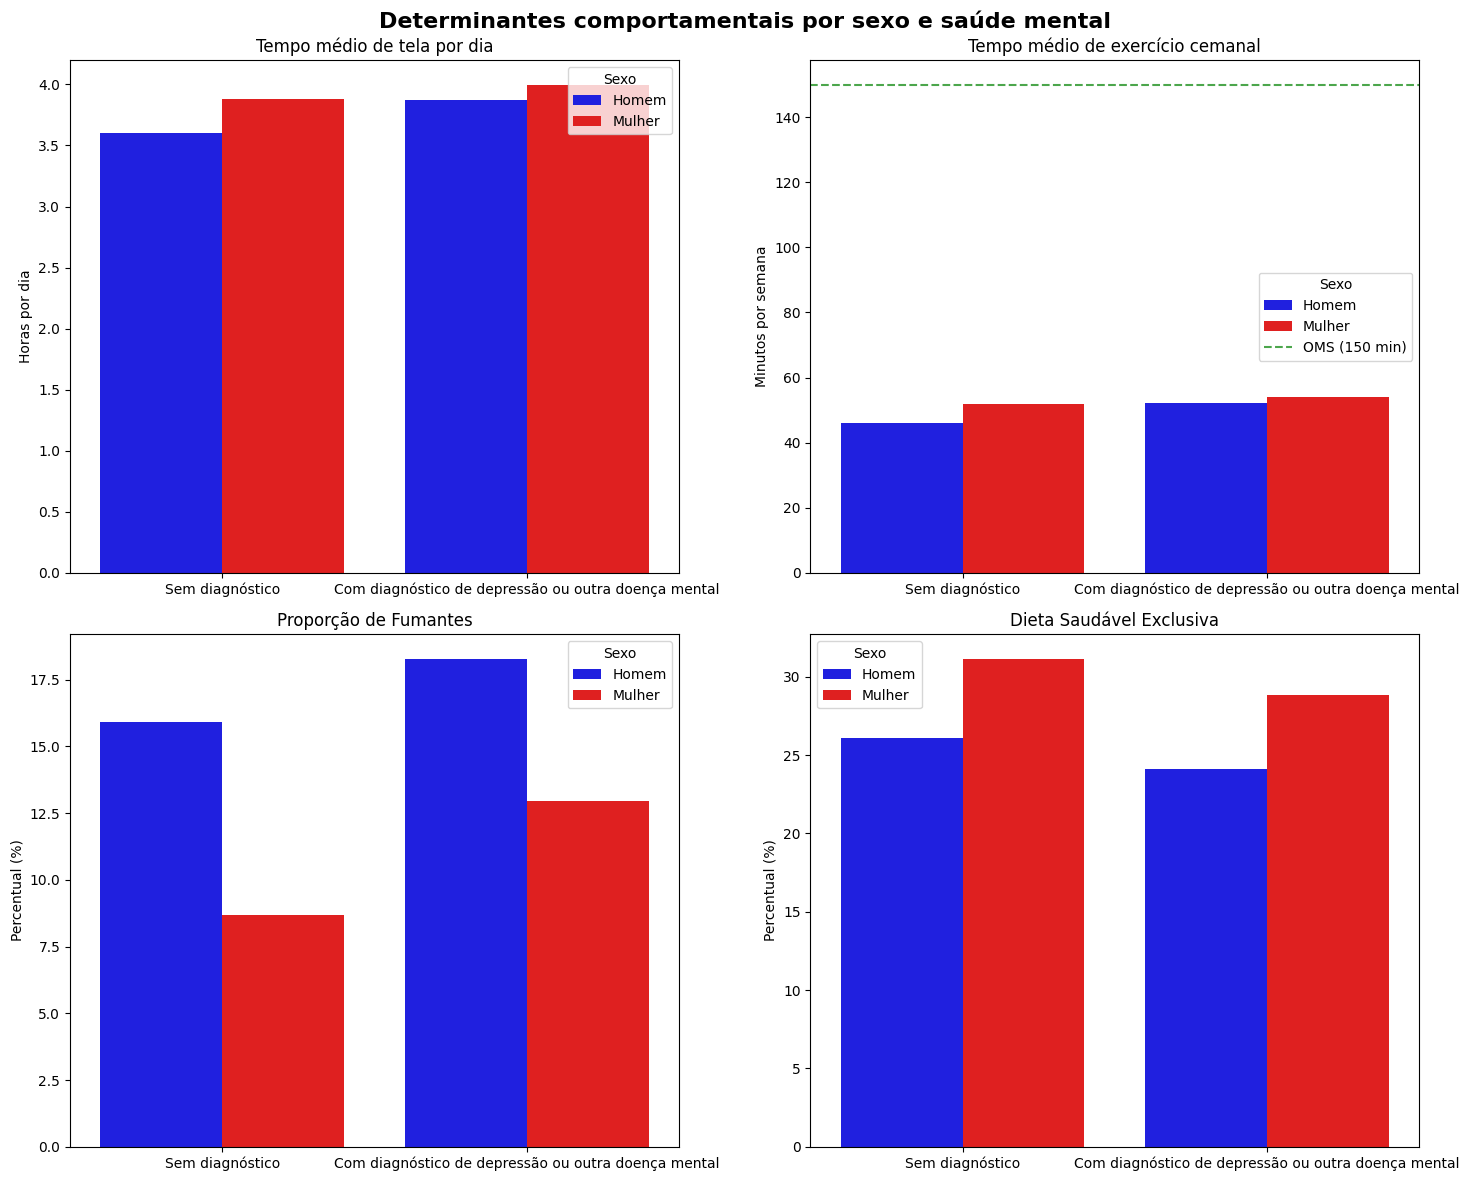


üìä ESTAT√çSTICAS RESUMIDAS:

üì± TEMPO DE TELA (horas/dia):
  Homem Sem diagn√≥stico: 3.6h
  Homem Com diagn√≥stico: 3.9h
  Mulher Sem diagn√≥stico: 3.9h
  Mulher Com diagn√≥stico: 4.0h

üí™ EXERC√çCIO (minutos/semana):
  Homem Sem diagn√≥stico: 46min
  Homem Com diagn√≥stico: 52min
  Mulher Sem diagn√≥stico: 52min
  Mulher Com diagn√≥stico: 54min

üö¨ FUMANTES (%):
  Homem Sem diagn√≥stico: 15.9%
  Homem Com diagn√≥stico: 18.3%
  Mulher Sem diagn√≥stico: 8.7%
  Mulher Com diagn√≥stico: 12.9%

ü•ó DIETA SAUD√ÅVEL EXCLUSIVA (%):
  Homem Sem diagn√≥stico: 26.1%
  Homem Com diagn√≥stico: 24.1%
  Mulher Sem diagn√≥stico: 31.2%
  Mulher Com diagn√≥stico: 28.8%


In [38]:
print("=== CRIANDO GR√ÅFICOS SOBRE DETERMINANTES COMPORTAMENTAIS ===\n")

# Converter vari√°veis para num√©rico
variaveis_numericas = ['minutos_semanais', 'horas_telas_total', 'fumante', 'health_diet', 'unhealth_diet']
variaveis_dummy = ['depressao_dummy', 'outro_diagnostico_dummy', 'sex_dummy']

for var in variaveis_numericas + variaveis_dummy:
    if var in df.columns:
        df[var] = pd.to_numeric(df[var], errors='coerce')

# Criar vari√°vel combinada para qualquer doen√ßa mental
if all(col in df.columns for col in ['depressao_dummy', 'outro_diagnostico_dummy']):
    df['qualquer_doenca_mental'] = ((df['depressao_dummy'] == 1) | (df['outro_diagnostico_dummy'] == 1)).astype(int)

# Criar vari√°vel dieta_saudavel_exclusiva
if all(col in df.columns for col in ['health_diet', 'unhealth_diet']):
    df['dieta_saudavel_exclusiva'] = 0
    df.loc[(df['health_diet'] == 1) & (df['unhealth_diet'] == 0), 'dieta_saudavel_exclusiva'] = 1

# Configurar estilo dos gr√°ficos
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Determinantes comportamentais por sexo e sa√∫de mental', fontsize=16, fontweight='bold')

# 1. GR√ÅFICO: Tempo de tela entre homens e mulheres com/sem diagn√≥stico
if all(col in df.columns for col in ['horas_telas_total', 'sex_dummy', 'qualquer_doenca_mental']):
    # Preparar dados
    dados_tela = df.groupby(['sex_dummy', 'qualquer_doenca_mental'])['horas_telas_total'].mean().reset_index()
    dados_tela['sexo'] = dados_tela['sex_dummy'].map({0: 'Homem', 1: 'Mulher'})
    dados_tela['diagnostico'] = dados_tela['qualquer_doenca_mental'].map({0: 'Sem diagn√≥stico', 1: 'Com diagn√≥stico de depress√£o ou outra doen√ßa mental'})

    # Criar gr√°fico
    sns.barplot(data=dados_tela, x='diagnostico', y='horas_telas_total', hue='sexo',
                palette=['blue', 'red'], ax=axes[0,0])
    axes[0,0].set_title('Tempo m√©dio de tela por dia')
    axes[0,0].set_ylabel('Horas por dia')
    axes[0,0].set_xlabel('')
    axes[0,0].legend(title='Sexo')

# 2. GR√ÅFICO: Tempo de exerc√≠cio semanal
if all(col in df.columns for col in ['minutos_semanais', 'sex_dummy', 'qualquer_doenca_mental']):
    # Preparar dados
    dados_exercicio = df.groupby(['sex_dummy', 'qualquer_doenca_mental'])['minutos_semanais'].mean().reset_index()
    dados_exercicio['sexo'] = dados_exercicio['sex_dummy'].map({0: 'Homem', 1: 'Mulher'})
    dados_exercicio['diagnostico'] = dados_exercicio['qualquer_doenca_mental'].map({0: 'Sem diagn√≥stico', 1: 'Com diagn√≥stico de depress√£o ou outra doen√ßa mental'})

    # Criar gr√°fico
    sns.barplot(data=dados_exercicio, x='diagnostico', y='minutos_semanais', hue='sexo',
                palette=['blue', 'red'], ax=axes[0,1])
    axes[0,1].set_title('Tempo m√©dio de exerc√≠cio cemanal')
    axes[0,1].set_ylabel('Minutos por semana')
    axes[0,1].set_xlabel('')
    axes[0,1].legend(title='Sexo')

    # Adicionar linha da recomenda√ß√£o OMS
    axes[0,1].axhline(y=150, color='green', linestyle='--', alpha=0.7, label='OMS (150 min)')
    axes[0,1].legend(title='Sexo')

# 3. GR√ÅFICO: Propor√ß√£o de fumantes
if all(col in df.columns for col in ['fumante', 'sex_dummy', 'qualquer_doenca_mental']):
    # Preparar dados
    dados_fumante = df.groupby(['sex_dummy', 'qualquer_doenca_mental'])['fumante'].mean().reset_index()
    dados_fumante['sexo'] = dados_fumante['sex_dummy'].map({0: 'Homem', 1: 'Mulher'})
    dados_fumante['diagnostico'] = dados_fumante['qualquer_doenca_mental'].map({0: 'Sem diagn√≥stico', 1: 'Com diagn√≥stico de depress√£o ou outra doen√ßa mental'})
    dados_fumante['fumante_percent'] = dados_fumante['fumante'] * 100

    # Criar gr√°fico
    sns.barplot(data=dados_fumante, x='diagnostico', y='fumante_percent', hue='sexo',
                palette=['blue', 'red'], ax=axes[1,0])
    axes[1,0].set_title('Propor√ß√£o de Fumantes')
    axes[1,0].set_ylabel('Percentual (%)')
    axes[1,0].set_xlabel('')
    axes[1,0].legend(title='Sexo')

# 4. GR√ÅFICO: Dieta saud√°vel exclusiva
if all(col in df.columns for col in ['dieta_saudavel_exclusiva', 'sex_dummy', 'qualquer_doenca_mental']):
    # Preparar dados
    dados_dieta = df.groupby(['sex_dummy', 'qualquer_doenca_mental'])['dieta_saudavel_exclusiva'].mean().reset_index()
    dados_dieta['sexo'] = dados_dieta['sex_dummy'].map({0: 'Homem', 1: 'Mulher'})
    dados_dieta['diagnostico'] = dados_dieta['qualquer_doenca_mental'].map({0: 'Sem diagn√≥stico', 1: 'Com diagn√≥stico de depress√£o ou outra doen√ßa mental'})
    dados_dieta['dieta_percent'] = dados_dieta['dieta_saudavel_exclusiva'] * 100

    # Criar gr√°fico
    sns.barplot(data=dados_dieta, x='diagnostico', y='dieta_percent', hue='sexo',
                palette=['blue', 'red'], ax=axes[1,1])
    axes[1,1].set_title('Dieta Saud√°vel Exclusiva')
    axes[1,1].set_ylabel('Percentual (%)')
    axes[1,1].set_xlabel('')
    axes[1,1].legend(title='Sexo')

plt.tight_layout()
plt.show()

# Mostrar estat√≠sticas resumidas
print("\nüìä ESTAT√çSTICAS RESUMIDAS:")

if 'horas_telas_total' in df.columns:
    print(f"\nüì± TEMPO DE TELA (horas/dia):")
    for sexo in [0, 1]:
        for diagnostico in [0, 1]:
            subset = df[(df['sex_dummy'] == sexo) & (df['qualquer_doenca_mental'] == diagnostico)]
            tempo = subset['horas_telas_total'].mean()
            sexo_nome = 'Homem' if sexo == 0 else 'Mulher'
            diagnostico_nome = 'Sem diagn√≥stico' if diagnostico == 0 else 'Com diagn√≥stico'
            print(f"  {sexo_nome} {diagnostico_nome}: {tempo:.1f}h")

if 'minutos_semanais' in df.columns:
    print(f"\nüí™ EXERC√çCIO (minutos/semana):")
    for sexo in [0, 1]:
        for diagnostico in [0, 1]:
            subset = df[(df['sex_dummy'] == sexo) & (df['qualquer_doenca_mental'] == diagnostico)]
            tempo = subset['minutos_semanais'].mean()
            sexo_nome = 'Homem' if sexo == 0 else 'Mulher'
            diagnostico_nome = 'Sem diagn√≥stico' if diagnostico == 0 else 'Com diagn√≥stico'
            print(f"  {sexo_nome} {diagnostico_nome}: {tempo:.0f}min")

if 'fumante' in df.columns:
    print(f"\nüö¨ FUMANTES (%):")
    for sexo in [0, 1]:
        for diagnostico in [0, 1]:
            subset = df[(df['sex_dummy'] == sexo) & (df['qualquer_doenca_mental'] == diagnostico)]
            percent = subset['fumante'].mean() * 100
            sexo_nome = 'Homem' if sexo == 0 else 'Mulher'
            diagnostico_nome = 'Sem diagn√≥stico' if diagnostico == 0 else 'Com diagn√≥stico'
            print(f"  {sexo_nome} {diagnostico_nome}: {percent:.1f}%")

if 'dieta_saudavel_exclusiva' in df.columns:
    print(f"\nü•ó DIETA SAUD√ÅVEL EXCLUSIVA (%):")
    for sexo in [0, 1]:
        for diagnostico in [0, 1]:
            subset = df[(df['sex_dummy'] == sexo) & (df['qualquer_doenca_mental'] == diagnostico)]
            percent = subset['dieta_saudavel_exclusiva'].mean() * 100
            sexo_nome = 'Homem' if sexo == 0 else 'Mulher'
            diagnostico_nome = 'Sem diagn√≥stico' if diagnostico == 0 else 'Com diagn√≥stico'
            print(f"  {sexo_nome} {diagnostico_nome}: {percent:.1f}%")